<h2 id='Part1'>A Look at the relevant data</h2>

In order to get a better understanding of the data we will be take a closer look in the first section, highlighting features and main take aways.

First, let's read in the data and necessary libraries.

Key questions that we would like to answer:

What is the AirBnb market in Seattle looking like? 
 



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string as str
from nltk.sentiment import SentimentIntensityAnalyzer
%matplotlib inline
import DataPrepFunctions as dtprep
from mpl_toolkits.basemap import Basemap
sia = SentimentIntensityAnalyzer()
df = pd.read_csv('./listings.csv')

num_rows = df.shape[0] 
num_cols = df.shape[1]

df.shape
df.dtypes.value_counts()

df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


<h3 id='Part1.1'> Property type </h3>

Taking a dive into the most common properties in the market and the most relevant features

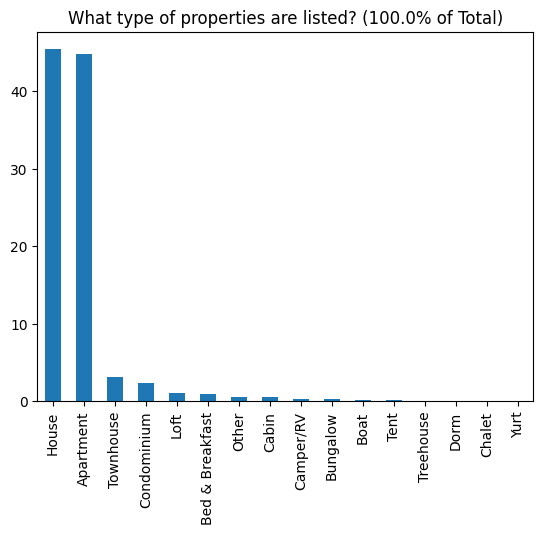

In [4]:
# Selection the columns relevant for our analysis 
prop_columns = ["property_type","room_type","bed_type","amenities","accommodates","bathrooms","bedrooms","beds"]
df_properties = df[prop_columns]

df_properties.head(5)
# selection the top 5 properties 
df_chart = df_properties['property_type'].value_counts(normalize = True)*100
df_chart
sampleSize= np.sum(df_chart)
df_chart.plot(kind = "bar");
plt.title(f'What type of properties are listed? ({sampleSize}% of Total)');


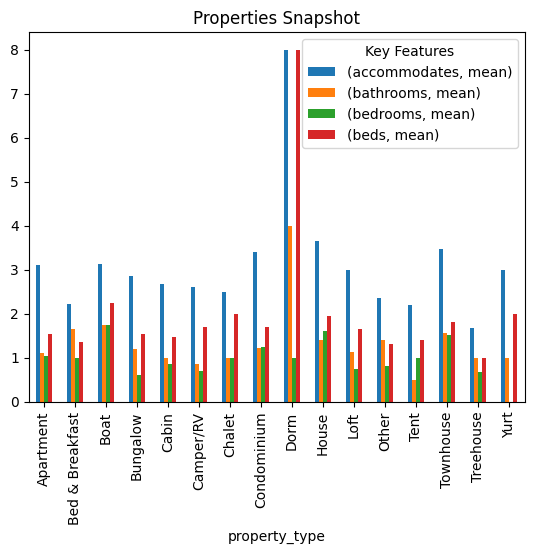

In [5]:
# Looking into the standard features of each property type
group_prop= df_properties.groupby("property_type",group_keys=True ,as_index=False)

group_prop[["accommodates","bathrooms","bedrooms","beds"]].agg(["mean"]).plot(kind = "bar")
plt.title("Properties Snapshot");
plt.legend(title="Key Features")

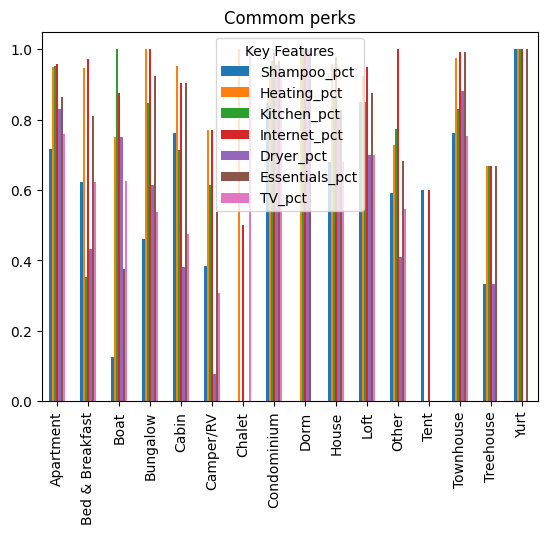

In [7]:
# What type of amenities are usually availabel witht the property
amenitis_list = []
# create the full list of available amenities and compute the percentage available for each type of properties
amenitis_list = dtprep.convert_colCont2List(df_properties,'amenities')
df_comm = dtprep.mostcommon_stuff(group_prop,df_properties,amenitis_list)

reduce_df_comm = df_comm.iloc[:, np.where((df_comm.median() > 0.5) == True)[0]]
reduce_df_comm.plot(kind = "bar")
plt.title("Commom perks");
plt.legend(title="Key Features")


<h3 id='Part1.2'> Location  </h3>

Looking into how the supply of properties is spread and what are the classic neighbours where to find the perfect airbnb 

Text(0.5, 1.0, 'Main Location for Seattle listings => 76.9 % of total')

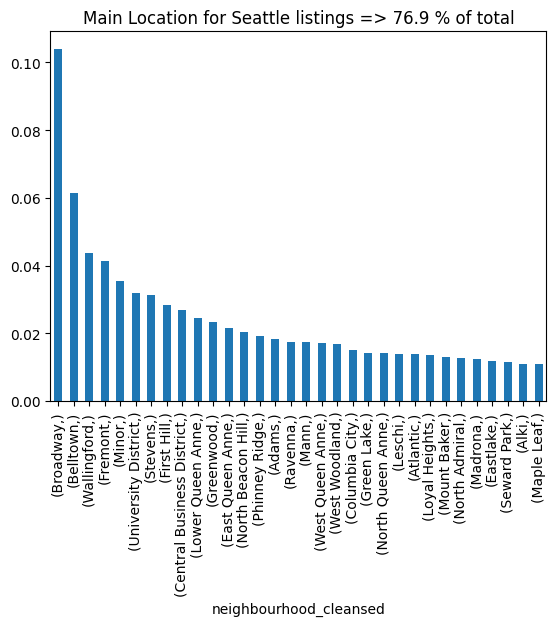

In [8]:
# granular location where the listings are located
loc_cols = ['neighbourhood_cleansed']
tot = (df
[loc_cols]
.value_counts()/df.shape[0])[(df
[loc_cols]
.value_counts()/df.shape[0])>0.01].sum()


(df
[loc_cols]
.value_counts()/df.shape[0])[(df
[loc_cols]
.value_counts()/df.shape[0])>0.01].plot(kind="bar")

plt.title(f'Main Location for Seattle listings => {np.round(tot*100,1)} % of total')
#Total sum of the neigborood with more than 1% of the listings



47.73335790856482 47.50508834369015 -122.0406070305399 -122.6172188142562


c:\Users\eusep\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


http://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/export?bbox=340508.75431432936,243546.62320081683,384434.3947458364,267916.2660754824&bboxSR=3691&imageSR=3691&size=2000,2000&dpi=96&format=png32&transparent=true&f=image


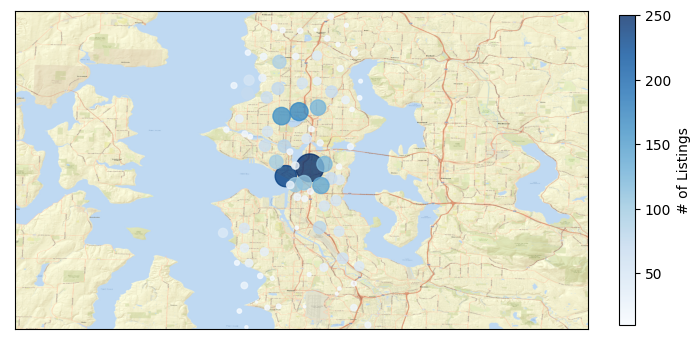

In [15]:
# Let's try to represent them on the map 
loc2_cols = ['neighbourhood_cleansed','latitude','longitude']	

# limits latitude
maxlat= np.max(df["latitude"])
minlat= np.min(df["latitude"])

# limits longitude
maxlong= np.max(df["longitude"])+0.2
minlong=np.min(df["longitude"])-0.2

long= np.mean(df["longitude"])
lat= np.mean(df["latitude"])

print(maxlat,minlat,maxlong,minlong)

dtgroup=(df
[loc2_cols].groupby('neighbourhood_cleansed',as_index=False)
       .agg(Lat=pd.NamedAgg(column="latitude", aggfunc=np.mean),
            Long=pd.NamedAgg(column="longitude", aggfunc=np.mean),
            Count=pd.NamedAgg(column="longitude", aggfunc=np.size)))

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='merc', resolution='i',

             llcrnrlon=minlong,llcrnrlat=minlat,urcrnrlon=maxlong, urcrnrlat=maxlat, epsg = 3691 , lat_0= lat, lon_0 = long
             )

#test_map = Basemap(,resolution='i',projection='merc',lon_0=14.8,lat_0=47.2)
m.arcgisimage(service='World_Street_Map', xpixels=2000, ypixels=2000, verbose= True)

m.scatter(dtgroup["Long"].values,dtgroup["Lat"].values , latlon=True,
          c=dtgroup["Count"].values, s=dtgroup["Count"].values,
          cmap='Blues', alpha=0.8)

plt.colorbar(label="# of Listings",fraction=0.025)
plt.clim(10, 250)          
#m.drawcoastlines(color='gray')
#m.drawcountries(color='gray')
#m.drawstates(color='gray')
